In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
from SalesDataCleaner import SalesDataCleaner

In [3]:
url = 'https://raw.githubusercontent.com/FrancescoMariottini/project3/main/inputs/all_sales_data.csv'
sdc = SalesDataCleaner(url)
sdc.clean()

In [5]:
sdc_df = sdc.get_cleaned_data()

In [6]:
sdc_df

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,36.0,True,1000.0,1403.0,NaN,False,W,good
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,0.0,True,977.0,1526.0,NaN,False,F,good
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,0.0,False,0.0,760.0,NaN,False,W,to_renovate
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,0.0,False,0.0,63.0,NaN,False,B,renovated
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,0.0,True,60.0,193.0,NaN,False,B,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45822,4,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,False,0.0,False,0.0,0.0,2.0,False,F,good
45864,4,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,True,12.0,False,0.0,0.0,1.0,False,F,good
45976,4,2610,False,APARTMENT,1500000.0,10.0,520.0,True,False,False,False,0.0,True,72.0,0.0,2.0,False,F,good
46189,4,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,False,0.0,False,0.0,0.0,2.0,False,F,to_renovate


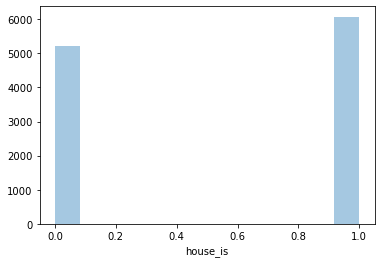

In [7]:
sb.distplot(sdc_df['house_is'],kde = False)
plt.show()